In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import os

from keras._tf_keras.keras.datasets import mnist
from keras._tf_keras.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder as le

from keras import models
from keras import layers, Input

from keras import losses, optimizers, metrics

GABUNGAN BATCH 16 & EPOCH 50

In [2]:
#Define Dataset
train_dir="Dataset/images_Gabungan/data48/train"
validation_dir="Dataset/images_Gabungan/data48/validation"
test_dir = "Dataset/Test/Test48"
dim = 48
input_shape = (dim, dim, 1)
output_class = 7
batch_size = 16  #diganti
epochs = 50      #diganti

In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+"/"+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [4]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,Dataset/images_Gabungan/data48/train\happy\533...,happy
1,Dataset/images_Gabungan/data48/train\neutral\1...,neutral
2,Dataset/images_Gabungan/data48/train\neutral\3...,neutral
3,Dataset/images_Gabungan/data48/train\happy\hap...,happy
4,Dataset/images_Gabungan/data48/train\neutral\1...,neutral


In [5]:
validation = pd.DataFrame()
validation['image'], validation['label'] = load_dataset(validation_dir)
validation = validation.sample(frac=1).reset_index(drop=True)
validation.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,Dataset/images_Gabungan/data48/validation\neut...,neutral
1,Dataset/images_Gabungan/data48/validation\happ...,happy
2,Dataset/images_Gabungan/data48/validation\disg...,disgust
3,Dataset/images_Gabungan/data48/validation\happ...,happy
4,Dataset/images_Gabungan/data48/validation\fear...,fear


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_dir)
test = test.sample(frac=1).reset_index(drop=True)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,Dataset/Test/Test48\surprise\DSC06560_face_0_f...,surprise
1,Dataset/Test/Test48\fear\DSC06765_face_0_face_...,fear
2,Dataset/Test/Test48\angry\DSC06652_face_0_face...,angry
3,Dataset/Test/Test48\sad\DSC06579_face_0_face_0...,sad
4,Dataset/Test/Test48\sad\DSC06600_face_0_face_0...,sad


In [7]:
from keras._tf_keras.keras.preprocessing.image import load_img
from tqdm.notebook import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), dim, dim, 1)
    return features

In [8]:
train_features = extract_features(train['image'])

  0%|          | 0/32943 [00:00<?, ?it/s]

In [9]:
val_features = extract_features(validation['image'])

  0%|          | 0/7893 [00:00<?, ?it/s]

In [10]:
test_features = extract_features(test['image'])

  0%|          | 0/317 [00:00<?, ?it/s]

In [11]:
## normalize the image
x_train = train_features/48.0
x_val = val_features/48.0
x_test = test_features/48.0

## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_val = le.transform(validation['label'])
y_test = le.transform(test['label'])

y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# Tentukan steps per epoch
steps_per_epoch = len(x_train) // batch_size
validation_steps = len(x_val) // batch_size
print(f'Steps per epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Steps per epoch: 2058
Validation steps: 493


In [12]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_16x50.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])


Epoch 1/50
2058/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1458 - loss: 2.0394
Epoch 1: val_accuracy improved from -inf to 0.16445, saving model to Gabungan_model_16x50.keras
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 95s 44ms/step - accuracy: 0.1458 - loss: 2.0394 - val_accuracy: 0.1644 - val_loss: 1.9442
Epoch 2/50
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1596 - loss: 1.9435
Epoch 2: val_accuracy did not improve from 0.16445
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 88s 43ms/step - accuracy: 0.1596 - loss: 1.9435 - val_accuracy: 0.1632 - val_loss: 1.9414
Epoch 3/50
2058/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1721 - loss: 1.9383
Epoch 3: val_accuracy improved from 0.16445 to 0.21982, saving model to Gabungan_model_16x50.keras
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 142s 43ms/step - accuracy: 0.1721 - loss: 1.9382 - val_accuracy: 0.2198 - val_loss: 1.9150
Epoch 4/50
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2069 - loss: 1.9047
Epoch 4: val_accuracy improved fro

In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_16x50.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_16x50.weights.h5")
model.save('Gabungan_model_16x50.keras')

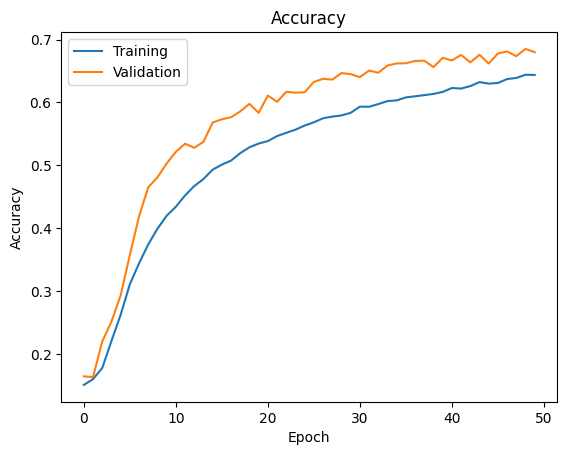

Text(0.5, 1.0, 'Loss')

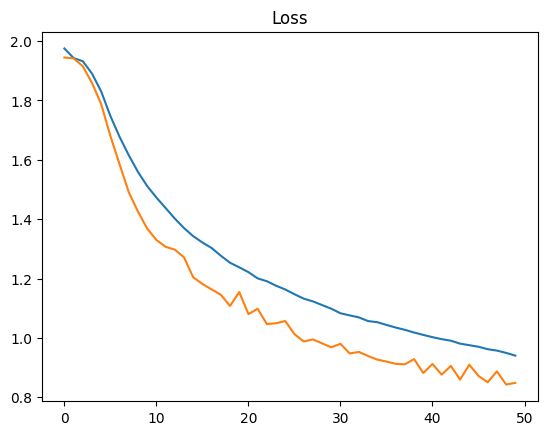

In [15]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.6842    0.5601    0.6160      1114
     disgust     0.7973    0.8032    0.8002       945
        fear     0.7046    0.4073    0.5162      1154
       happy     0.7914    0.8180    0.8045      1099
     neutral     0.5486    0.7319    0.6271      1257
         sad     0.4881    0.6069    0.5411      1216
    surprise     0.9219    0.8628    0.8914      1108

    accuracy                         0.6798      7893
   macro avg     0.7052    0.6843    0.6852      7893
weighted avg     0.6972    0.6798    0.6786      7893



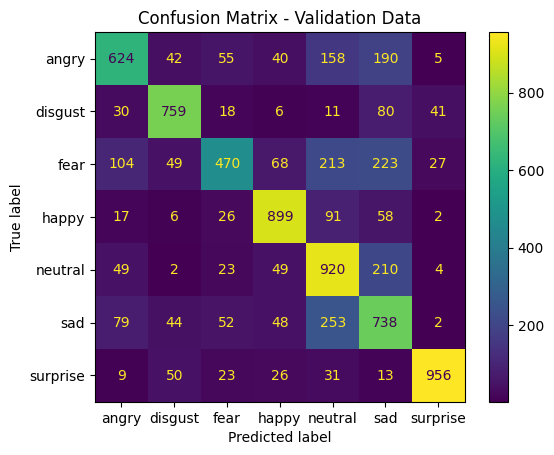

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.5484    0.3778    0.4474        45
     disgust     0.7857    0.4889    0.6027        45
        fear     0.5862    0.3696    0.4533        46
       happy     0.7736    0.8913    0.8283        46
     neutral     0.4409    0.9111    0.5942        45
         sad     0.5789    0.4889    0.5301        45
    surprise     0.8667    0.8667    0.8667        45

    accuracy                         0.6278       317
   macro avg     0.6543    0.6277    0.6175       317
weighted avg     0.6545    0.6278    0.6177       317



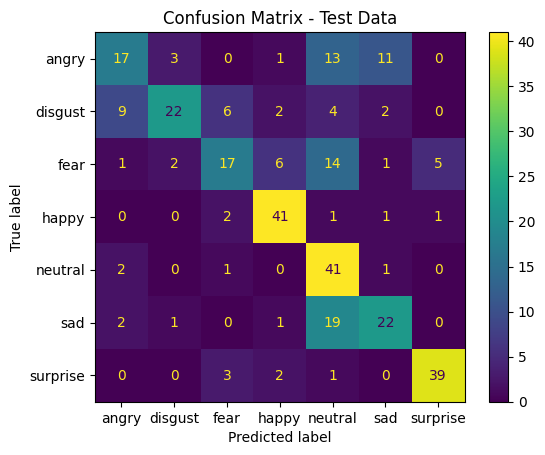

In [17]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)


# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()


GABUNGAN BATCH 32 & EPOCH 50

In [18]:
batch_size = 32  #diganti
epochs = 50      #diganti

In [19]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_32x50.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)  #Diganti
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])

Epoch 1/50
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1537 - loss: 2.0249
Epoch 1: val_accuracy improved from -inf to 0.16432, saving model to Gabungan_model_32x50.keras
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 85s 79ms/step - accuracy: 0.1537 - loss: 2.0248 - val_accuracy: 0.1643 - val_loss: 1.9447
Epoch 2/50
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1556 - loss: 1.9468
Epoch 2: val_accuracy improved from 0.16432 to 0.16496, saving model to Gabungan_model_32x50.keras
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.1556 - loss: 1.9468 - val_accuracy: 0.1650 - val_loss: 1.9427
Epoch 3/50
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1585 - loss: 1.9422
Epoch 3: val_accuracy improved from 0.16496 to 0.17775, saving model to Gabungan_model_32x50.keras
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.1585 - loss: 1.9422 - val_accuracy: 0.1778 - val_loss: 1.9411
Epoch 4/50
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1680 - 

In [21]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_32x50.json", "w") as json_file:   #Diganti
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_32x50.weights.h5")       #Diganti
model.save('Gabungan_model_32x50.keras')                    #Diganti

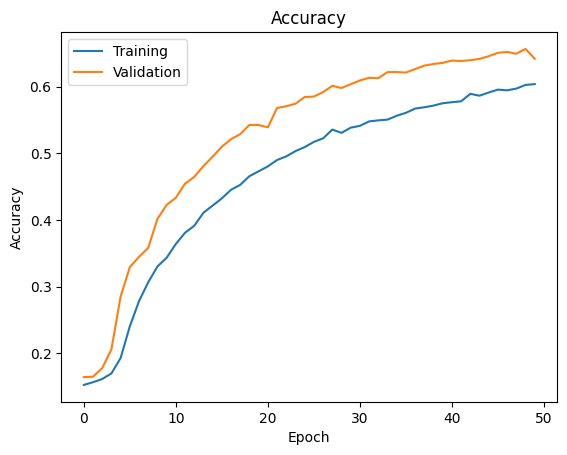

Text(0.5, 1.0, 'Loss')

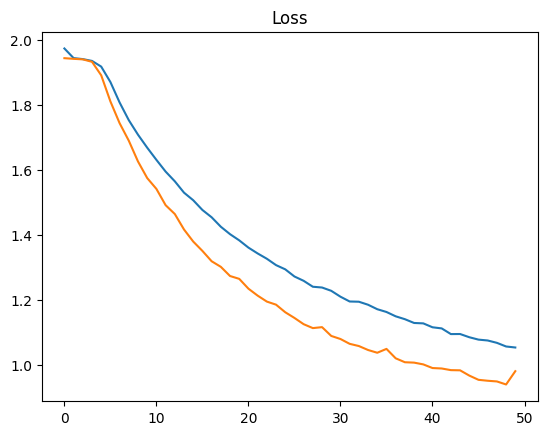

In [22]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.5555    0.6023    0.5780      1114
     disgust     0.8263    0.6646    0.7367       945
        fear     0.6110    0.4246    0.5010      1154
       happy     0.7919    0.7825    0.7872      1099
     neutral     0.5223    0.6881    0.5939      1257
         sad     0.4707    0.5485    0.5066      1216
    surprise     0.9201    0.8005    0.8562      1108

    accuracy                         0.6421      7893
   macro avg     0.6711    0.6445    0.6514      7893
weighted avg     0.6618    0.6421    0.6454      7893



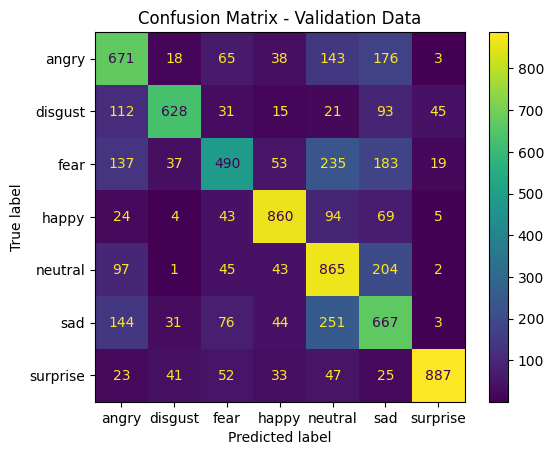

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.4615    0.4000    0.4286        45
     disgust     0.6667    0.2667    0.3810        45
        fear     0.4595    0.3696    0.4096        46
       happy     0.7455    0.8913    0.8119        46
     neutral     0.4124    0.8889    0.5634        45
         sad     0.5152    0.3778    0.4359        45
    surprise     0.8947    0.7556    0.8193        45

    accuracy                         0.5647       317
   macro avg     0.5936    0.5643    0.5499       317
weighted avg     0.5937    0.5647    0.5503       317



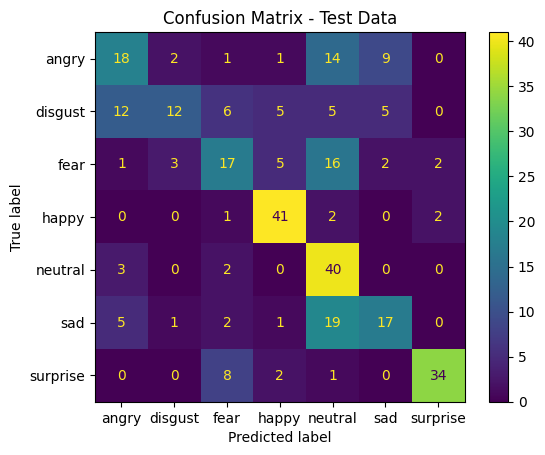

In [24]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

GABUNGAN BATCH 64 & EPOCH 50

In [25]:
batch_size = 64  #diganti
epochs = 50      #diganti

In [26]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_64x50.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)  #Diganti
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)


history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])


Epoch 1/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.1458 - loss: 2.0446
Epoch 1: val_accuracy improved from -inf to 0.16217, saving model to Gabungan_model_64x50.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 150ms/step - accuracy: 0.1458 - loss: 2.0445 - val_accuracy: 0.1622 - val_loss: 1.9446
Epoch 2/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.1584 - loss: 1.9476
Epoch 2: val_accuracy improved from 0.16217 to 0.16356, saving model to Gabungan_model_64x50.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 79s 153ms/step - accuracy: 0.1584 - loss: 1.9476 - val_accuracy: 0.1636 - val_loss: 1.9436
Epoch 3/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.1565 - loss: 1.9441
Epoch 3: val_accuracy improved from 0.16356 to 0.16863, saving model to Gabungan_model_64x50.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 77s 143ms/step - accuracy: 0.1565 - loss: 1.9441 - val_accuracy: 0.1686 - val_loss: 1.9429
Epoch 4/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.1622 - loss: 1

In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_64x50.json", "w") as json_file:   #Diganti
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_64x50.weights.h5")       #Diganti
model.save('Gabungan_model_64x50.keras')                    #Diganti

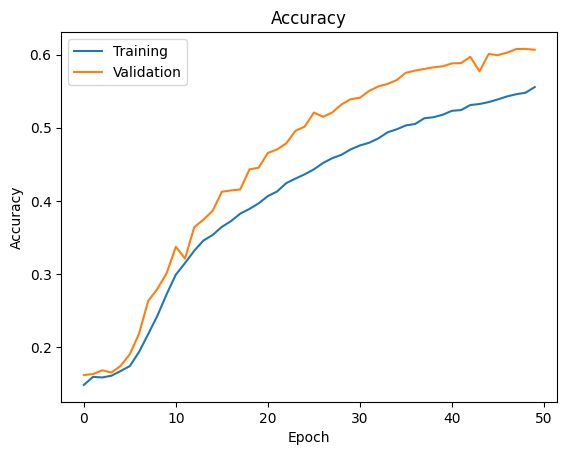

Text(0.5, 1.0, 'Loss')

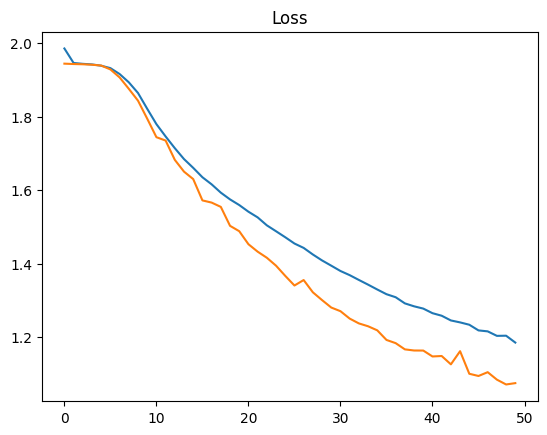

In [29]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.5265    0.5880    0.5556      1114
     disgust     0.7804    0.6392    0.7027       945
        fear     0.6035    0.3310    0.4275      1154
       happy     0.7712    0.7116    0.7402      1099
     neutral     0.4726    0.7072    0.5666      1257
         sad     0.4452    0.4605    0.4527      1216
    surprise     0.8411    0.8267    0.8339      1108

    accuracy                         0.6066      7893
   macro avg     0.6344    0.6092    0.6113      7893
weighted avg     0.6253    0.6066    0.6051      7893



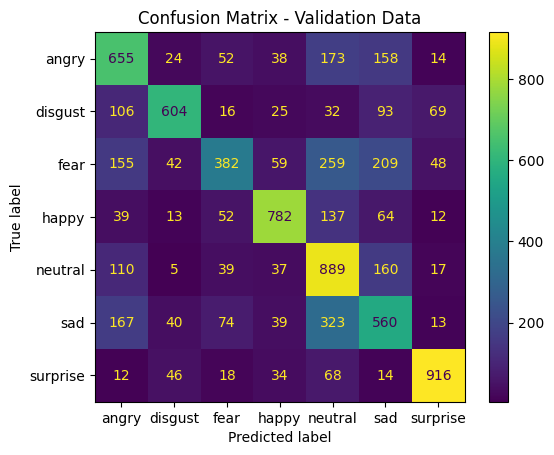

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.4545    0.3333    0.3846        45
     disgust     1.0000    0.0444    0.0851        45
        fear     0.3600    0.1957    0.2535        46
       happy     0.5882    0.8696    0.7018        46
     neutral     0.3228    0.9111    0.4767        45
         sad     0.4333    0.2889    0.3467        45
    surprise     0.8750    0.6222    0.7273        45

    accuracy                         0.4669       317
   macro avg     0.5763    0.4665    0.4251       317
weighted avg     0.5756    0.4669    0.4254       317



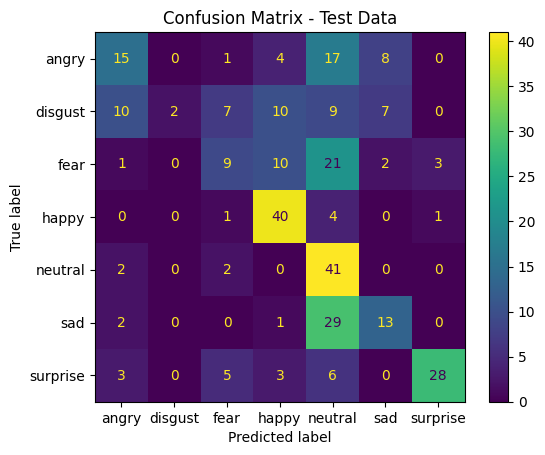

In [31]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

GABUNGAN BATCH 16 & EPOCH 100

In [32]:
batch_size = 16  #diganti
epochs = 100      #diganti

In [33]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_16x100.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)  #Diganti
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])


Epoch 1/100
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1478 - loss: 2.0350
Epoch 1: val_accuracy improved from -inf to 0.15913, saving model to Gabungan_model_16x100.keras
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 95s 44ms/step - accuracy: 0.1478 - loss: 2.0350 - val_accuracy: 0.1591 - val_loss: 1.9440
Epoch 2/100
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1556 - loss: 1.9445
Epoch 2: val_accuracy improved from 0.15913 to 0.16128, saving model to Gabungan_model_16x100.keras
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 140s 43ms/step - accuracy: 0.1556 - loss: 1.9445 - val_accuracy: 0.1613 - val_loss: 1.9431
Epoch 3/100
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1701 - loss: 1.9379
Epoch 3: val_accuracy improved from 0.16128 to 0.22830, saving model to Gabungan_model_16x100.keras
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 139s 41ms/step - accuracy: 0.1701 - loss: 1.9379 - val_accuracy: 0.2283 - val_loss: 1.9171
Epoch 4/100
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 

In [35]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_16x100.json", "w") as json_file:   #Diganti
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_16x100.weights.h5")       #Diganti
model.save('Gabungan_model_16x100.keras')                    #Diganti

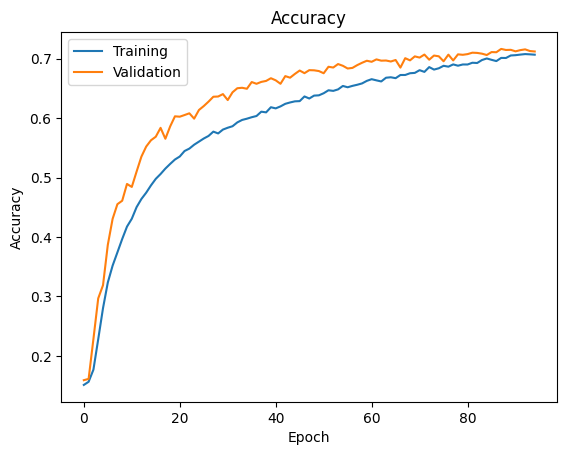

Text(0.5, 1.0, 'Loss')

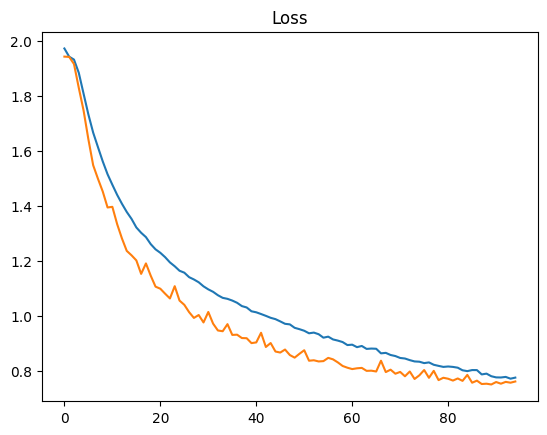

In [36]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.7112    0.6212    0.6632      1114
     disgust     0.8558    0.8540    0.8549       945
        fear     0.7261    0.4549    0.5594      1154
       happy     0.8073    0.8198    0.8135      1099
     neutral     0.5705    0.7757    0.6575      1257
         sad     0.5331    0.6020    0.5655      1216
    surprise     0.9366    0.8926    0.9140      1108

    accuracy                         0.7122      7893
   macro avg     0.7344    0.7172    0.7183      7893
weighted avg     0.7259    0.7122    0.7111      7893



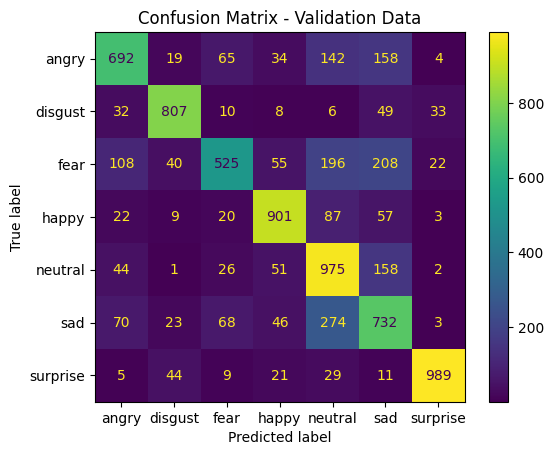

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.7619    0.7111    0.7356        45
     disgust     0.8947    0.7556    0.8193        45
        fear     0.8235    0.6087    0.7000        46
       happy     0.8776    0.9348    0.9053        46
     neutral     0.6721    0.9111    0.7736        45
         sad     0.8444    0.8444    0.8444        45
    surprise     0.8958    0.9556    0.9247        45

    accuracy                         0.8170       317
   macro avg     0.8243    0.8173    0.8147       317
weighted avg     0.8245    0.8170    0.8146       317



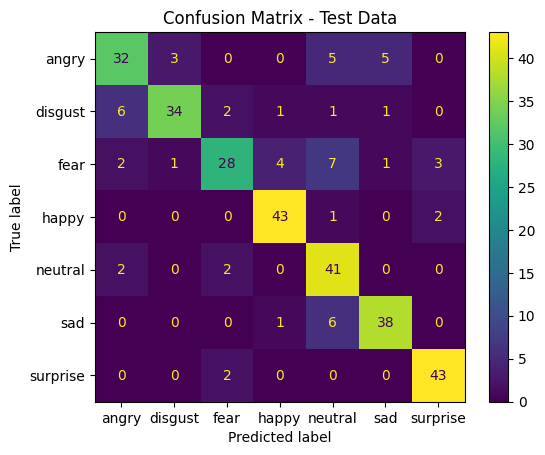

In [38]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

GABUNGAN BATCH 32 & EPOCH 100

In [39]:
batch_size = 32  #diganti
epochs = 100      #diganti

In [40]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_32x100.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)  #Diganti
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)


history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])


Epoch 1/100
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1488 - loss: 2.0622
Epoch 1: val_accuracy improved from -inf to 0.15621, saving model to Gabungan_model_32x100.keras
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 90s 84ms/step - accuracy: 0.1488 - loss: 2.0620 - val_accuracy: 0.1562 - val_loss: 1.9450
Epoch 2/100
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1572 - loss: 1.9488
Epoch 2: val_accuracy did not improve from 0.15621
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 87s 85ms/step - accuracy: 0.1572 - loss: 1.9488 - val_accuracy: 0.1528 - val_loss: 1.9440
Epoch 3/100
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1572 - loss: 1.9424
Epoch 3: val_accuracy improved from 0.15621 to 0.16698, saving model to Gabungan_model_32x100.keras
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 87s 85ms/step - accuracy: 0.1572 - loss: 1.9424 - val_accuracy: 0.1670 - val_loss: 1.9433
Epoch 4/100
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1655 - loss: 1.9402
Epoch 4: val_accuracy did not

In [42]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_32x100.json", "w") as json_file:   #Diganti
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_32x100.weights.h5")       #Diganti
model.save('Gabungan_model_32x100.keras')                    #Diganti

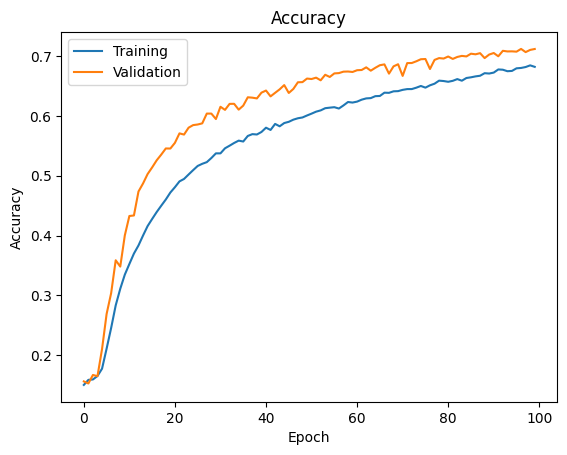

Text(0.5, 1.0, 'Loss')

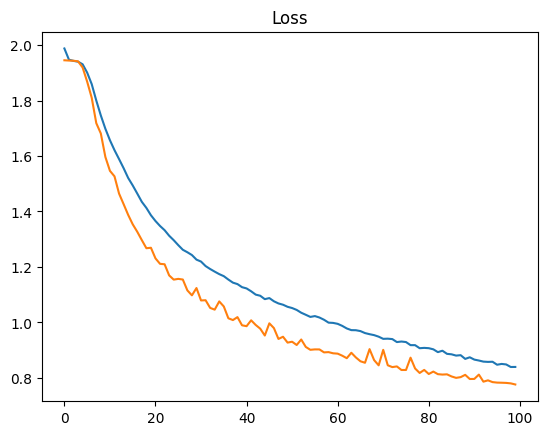

In [43]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.6841    0.6239    0.6526      1114
     disgust     0.7942    0.8942    0.8412       945
        fear     0.6726    0.4879    0.5655      1154
       happy     0.8197    0.8271    0.8234      1099
     neutral     0.6021    0.7319    0.6607      1257
         sad     0.5521    0.5444    0.5482      1216
    surprise     0.8982    0.9242    0.9110      1108

    accuracy                         0.7118      7893
   macro avg     0.7176    0.7191    0.7147      7893
weighted avg     0.7111    0.7118    0.7077      7893



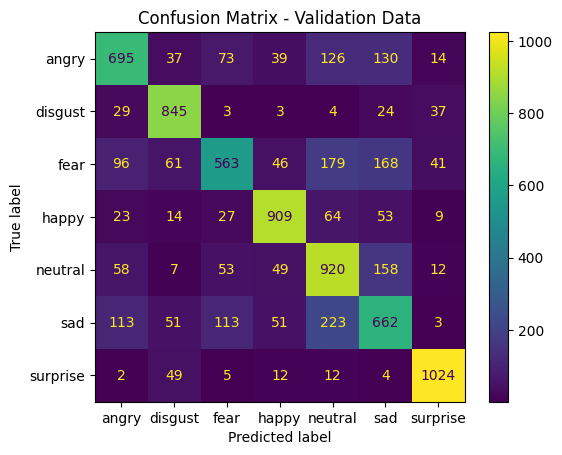

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.7297    0.6000    0.6585        45
     disgust     0.7174    0.7333    0.7253        45
        fear     0.8387    0.5652    0.6753        46
       happy     0.9130    0.9130    0.9130        46
     neutral     0.5882    0.8889    0.7080        45
         sad     0.7949    0.6889    0.7381        45
    surprise     0.8600    0.9556    0.9053        45

    accuracy                         0.7634       317
   macro avg     0.7774    0.7636    0.7605       317
weighted avg     0.7780    0.7634    0.7607       317



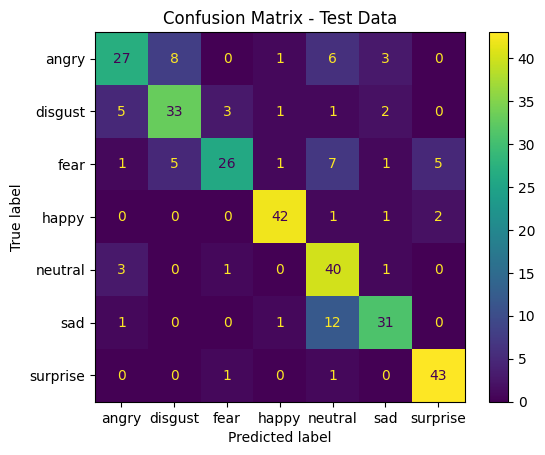

In [45]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

GABUNGAN BATCH 64 & EPOCH 100

In [46]:
batch_size = 64  #diganti
epochs = 100      #diganti

In [47]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_64x100.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)  #Diganti
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)


history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])


Epoch 1/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.1479 - loss: 2.0395
Epoch 1: val_accuracy improved from -inf to 0.15013, saving model to Gabungan_model_64x100.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 85s 155ms/step - accuracy: 0.1479 - loss: 2.0394 - val_accuracy: 0.1501 - val_loss: 1.9454
Epoch 2/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.1516 - loss: 1.9489
Epoch 2: val_accuracy improved from 0.15013 to 0.15951, saving model to Gabungan_model_64x100.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 84s 163ms/step - accuracy: 0.1516 - loss: 1.9489 - val_accuracy: 0.1595 - val_loss: 1.9444
Epoch 3/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.1581 - loss: 1.9458
Epoch 3: val_accuracy did not improve from 0.15951
515/515 ━━━━━━━━━━━━━━━━━━━━ 138s 154ms/step - accuracy: 0.1581 - loss: 1.9458 - val_accuracy: 0.1580 - val_loss: 1.9443
Epoch 4/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.1650 - loss: 1.9420
Epoch 4: val_accuracy improved from

In [49]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_64x100.json", "w") as json_file:   #Diganti
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_64x100.weights.h5")       #Diganti
model.save('Gabungan_model_64x100.keras')                    #Diganti

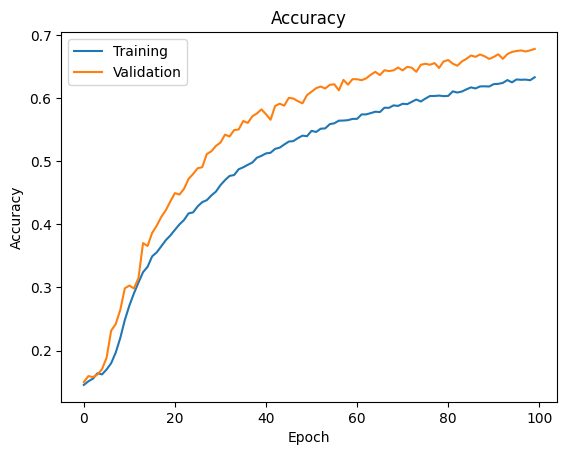

Text(0.5, 1.0, 'Loss')

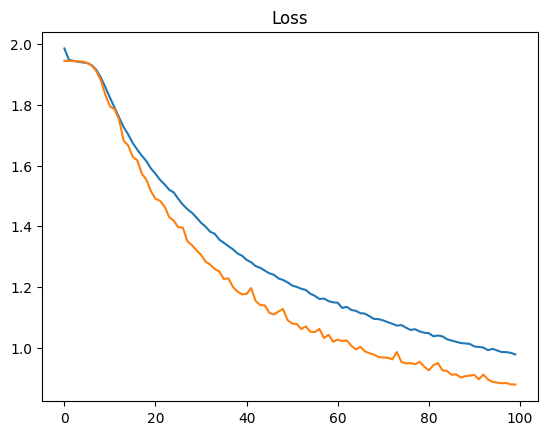

In [50]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.6489    0.6005    0.6238      1114
     disgust     0.7924    0.7757    0.7840       945
        fear     0.6924    0.4272    0.5284      1154
       happy     0.7769    0.8144    0.7952      1099
     neutral     0.5653    0.7200    0.6333      1257
         sad     0.4954    0.5724    0.5311      1216
    surprise     0.8988    0.8655    0.8818      1108

    accuracy                         0.6778      7893
   macro avg     0.6957    0.6822    0.6825      7893
weighted avg     0.6884    0.6778    0.6763      7893



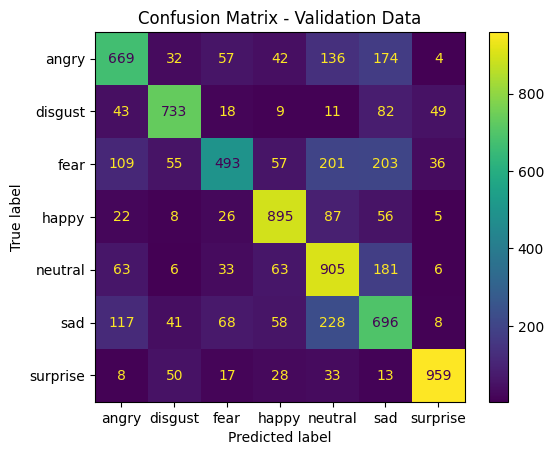

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.5714    0.4444    0.5000        45
     disgust     0.7273    0.3556    0.4776        45
        fear     0.6216    0.5000    0.5542        46
       happy     0.7018    0.8696    0.7767        46
     neutral     0.4457    0.9111    0.5985        45
         sad     0.6061    0.4444    0.5128        45
    surprise     0.8780    0.8000    0.8372        45

    accuracy                         0.6183       317
   macro avg     0.6503    0.6179    0.6082       317
weighted avg     0.6503    0.6183    0.6085       317



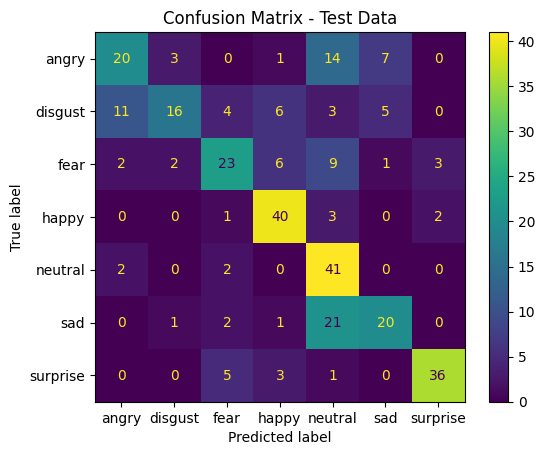

In [52]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

GABUNGAN BATCH 16 & EPOCH 150

In [12]:
batch_size = 16  #diganti
epochs = 150      #diganti

In [13]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_16x150.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)  #Diganti
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])


Epoch 1/150
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1555 - loss: 1.9768
Epoch 1: val_accuracy improved from -inf to 0.16521, saving model to Gabungan_model_16x150.keras
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 126s 59ms/step - accuracy: 0.1555 - loss: 1.9767 - val_accuracy: 0.1652 - val_loss: 1.9430
Epoch 2/150
2058/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1614 - loss: 1.9399
Epoch 2: val_accuracy improved from 0.16521 to 0.18257, saving model to Gabungan_model_16x150.keras
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 140s 58ms/step - accuracy: 0.1614 - loss: 1.9399 - val_accuracy: 0.1826 - val_loss: 1.9360
Epoch 3/150
2058/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1872 - loss: 1.9224
Epoch 3: val_accuracy improved from 0.18257 to 0.25339, saving model to Gabungan_model_16x150.keras
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 143s 59ms/step - accuracy: 0.1872 - loss: 1.9223 - val_accuracy: 0.2534 - val_loss: 1.8856
Epoch 4/150
2058/2059 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy:

In [15]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_16x150.json", "w") as json_file:   #Diganti
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_16x150.weights.h5")       #Diganti
model.save('Gabungan_model_16x150.keras')                    #Diganti

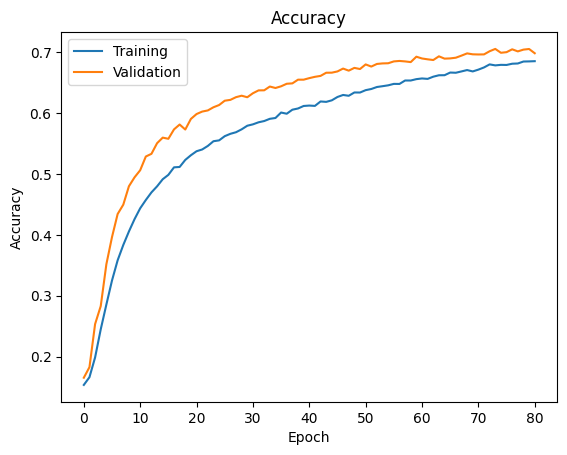

Text(0.5, 1.0, 'Loss')

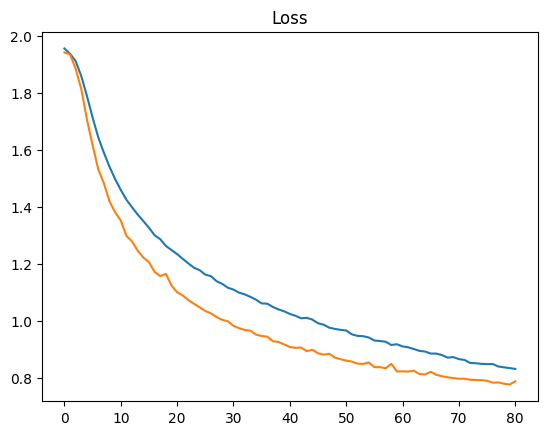

In [16]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.7117    0.5673    0.6314      1114
     disgust     0.7794    0.8635    0.8193       945
        fear     0.6741    0.4480    0.5383      1154
       happy     0.7746    0.8444    0.8080      1099
     neutral     0.5879    0.7104    0.6434      1257
         sad     0.5523    0.5691    0.5606      1216
    surprise     0.8485    0.9350    0.8897      1108

    accuracy                         0.6986      7893
   macro avg     0.7041    0.7054    0.6986      7893
weighted avg     0.6980    0.6986    0.6921      7893



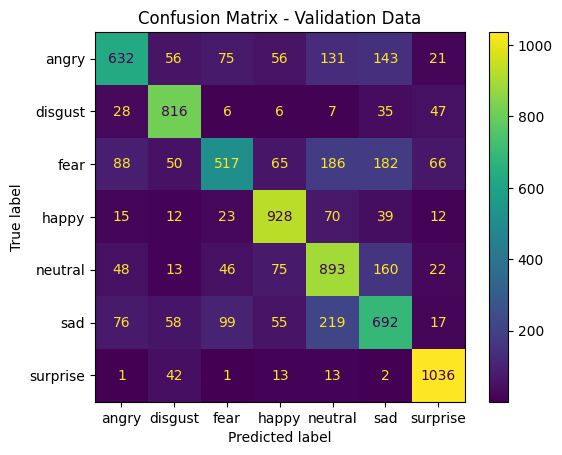

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.7812    0.5556    0.6494        45
     disgust     0.7692    0.6667    0.7143        45
        fear     0.7667    0.5000    0.6053        46
       happy     0.8431    0.9348    0.8866        46
     neutral     0.5890    0.9556    0.7288        45
         sad     0.7857    0.7333    0.7586        45
    surprise     0.8800    0.9778    0.9263        45

    accuracy                         0.7603       317
   macro avg     0.7736    0.7605    0.7527       317
weighted avg     0.7738    0.7603    0.7527       317



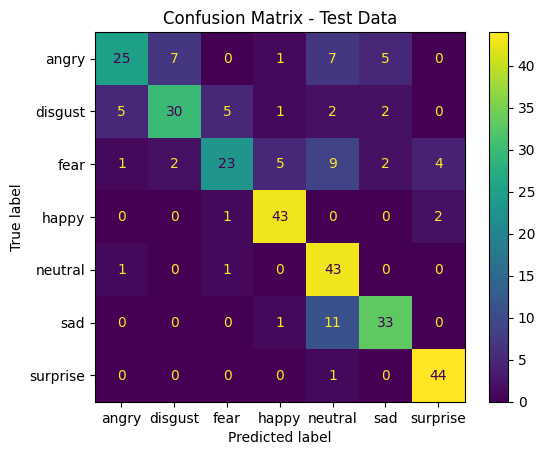

In [18]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

GABUNGAN BATCH 32 & EPOCH 150

In [60]:
batch_size = 32  #diganti
epochs = 150      #diganti

In [61]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_32x150.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)  #Diganti
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])


Epoch 1/150
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.1474 - loss: 2.0091
Epoch 1: val_accuracy improved from -inf to 0.15089, saving model to Gabungan_model_32x150.keras
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 116s 107ms/step - accuracy: 0.1474 - loss: 2.0090 - val_accuracy: 0.1509 - val_loss: 1.9447
Epoch 2/150
1029/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.1574 - loss: 1.9449
Epoch 2: val_accuracy improved from 0.15089 to 0.15305, saving model to Gabungan_model_32x150.keras
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 103s 100ms/step - accuracy: 0.1574 - loss: 1.9449 - val_accuracy: 0.1530 - val_loss: 1.9430
Epoch 3/150
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.1673 - loss: 1.9393
Epoch 3: val_accuracy improved from 0.15305 to 0.16559, saving model to Gabungan_model_32x150.keras
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 107s 104ms/step - accuracy: 0.1673 - loss: 1.9393 - val_accuracy: 0.1656 - val_loss: 1.9382
Epoch 4/150
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accur

In [63]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_32x150.json", "w") as json_file:   #Diganti
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_32x150.weights.h5")       #Diganti
model.save('Gabungan_model_32x150.keras')                    #Diganti

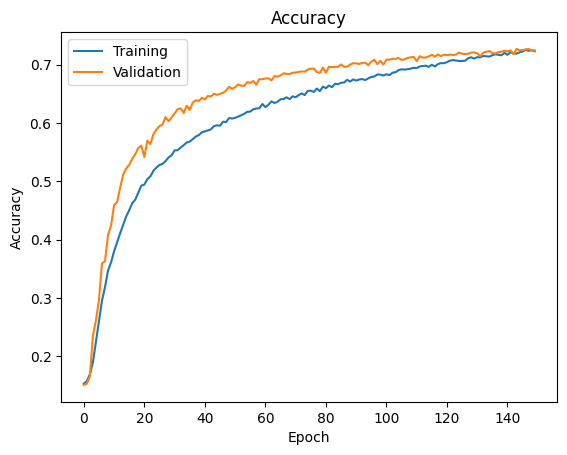

Text(0.5, 1.0, 'Loss')

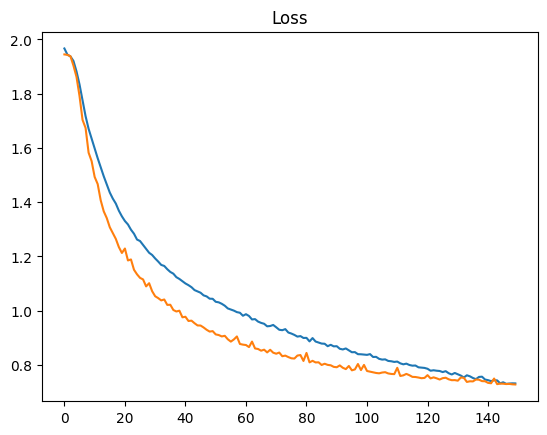

In [64]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.6939    0.6329    0.6620      1114
     disgust     0.8295    0.8857    0.8567       945
        fear     0.7015    0.5173    0.5955      1154
       happy     0.8265    0.8408    0.8336      1099
     neutral     0.6119    0.7224    0.6625      1257
         sad     0.5505    0.5913    0.5702      1216
    surprise     0.9252    0.9260    0.9256      1108

    accuracy                         0.7242      7893
   macro avg     0.7341    0.7309    0.7294      7893
weighted avg     0.7270    0.7242    0.7224      7893



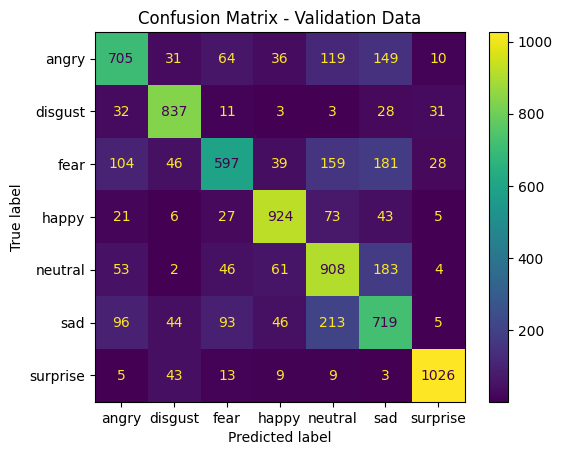

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.8750    0.6222    0.7273        45
     disgust     0.8261    0.8444    0.8352        45
        fear     0.9118    0.6739    0.7750        46
       happy     0.8824    0.9783    0.9278        46
     neutral     0.6515    0.9556    0.7748        45
         sad     0.8500    0.7556    0.8000        45
    surprise     0.9375    1.0000    0.9677        45

    accuracy                         0.8328       317
   macro avg     0.8477    0.8329    0.8297       317
weighted avg     0.8481    0.8328    0.8298       317



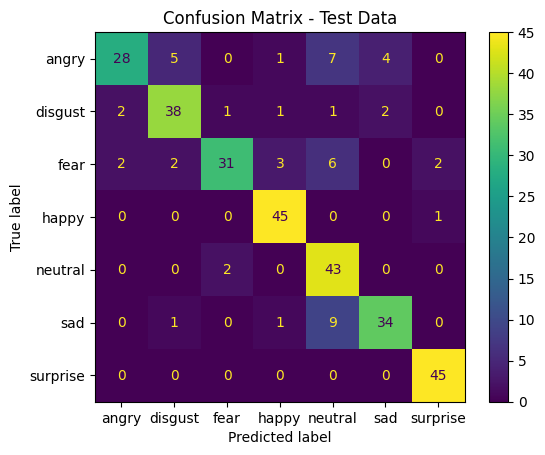

In [66]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

GABUNGAN BATCH 64 & EPOCH 150

In [67]:
batch_size = 64  #diganti
epochs = 150      #diganti

In [68]:
model = models.Sequential()

model.add(Input(shape=(input_shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))



model.compile(optimizer=optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])


#SUMMARY
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,943 (1.22 MB)

 Trainable params: 319,943 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
#DEFINE CALLBACK
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('Gabungan_model_64x150.keras', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)  #Diganti
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, verbose=1)


history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint, earlystop])


Epoch 1/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.1487 - loss: 2.0714
Epoch 1: val_accuracy improved from -inf to 0.16242, saving model to Gabungan_model_64x150.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 121s 215ms/step - accuracy: 0.1487 - loss: 2.0712 - val_accuracy: 0.1624 - val_loss: 1.9451
Epoch 2/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.1602 - loss: 1.9462
Epoch 2: val_accuracy did not improve from 0.16242
515/515 ━━━━━━━━━━━━━━━━━━━━ 103s 201ms/step - accuracy: 0.1602 - loss: 1.9462 - val_accuracy: 0.1601 - val_loss: 1.9437
Epoch 3/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1538 - loss: 1.9448
Epoch 3: val_accuracy improved from 0.16242 to 0.16306, saving model to Gabungan_model_64x150.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 105s 204ms/step - accuracy: 0.1538 - loss: 1.9448 - val_accuracy: 0.1631 - val_loss: 1.9431
Epoch 4/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1612 - loss: 1.9412
Epoch 4: val_accuracy improved fr

In [70]:
# serialize model to JSON
model_json = model.to_json()
with open("Gabungan_model_64x150.json", "w") as json_file:   #Diganti
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Gabungan_model_64x150.weights.h5")       #Diganti
model.save('Gabungan_model_64x150.keras')                    #Diganti

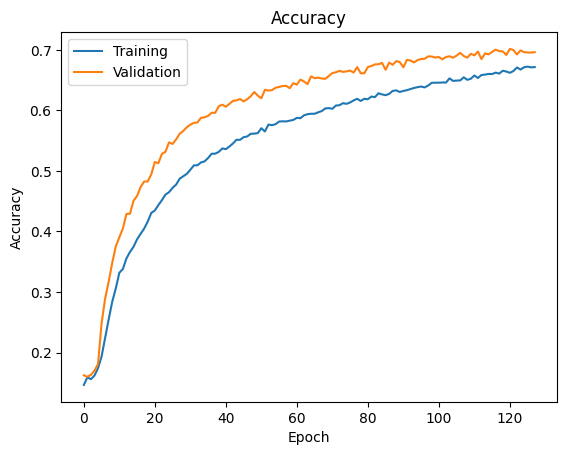

Text(0.5, 1.0, 'Loss')

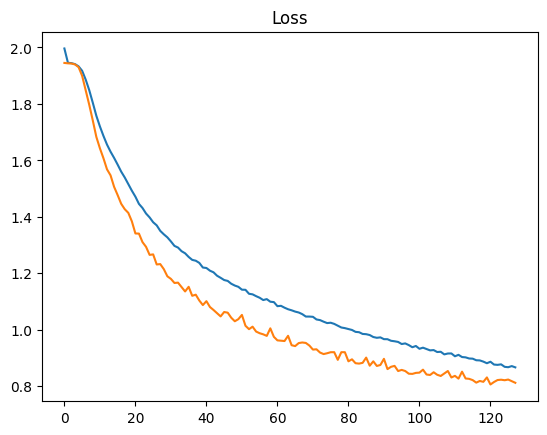

In [71]:
# plot accuracy and loss training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step
Classification Report for Validation Data
              precision    recall  f1-score   support

       angry     0.6810    0.6131    0.6453      1114
     disgust     0.8364    0.8222    0.8292       945
        fear     0.7041    0.4125    0.5202      1154
       happy     0.7837    0.8471    0.8142      1099
     neutral     0.5683    0.7446    0.6446      1257
         sad     0.5154    0.5905    0.5504      1216
    surprise     0.9215    0.8791    0.8998      1108

    accuracy                         0.6962      7893
   macro avg     0.7158    0.7013    0.7005      7893
weighted avg     0.7076    0.6962    0.6935      7893



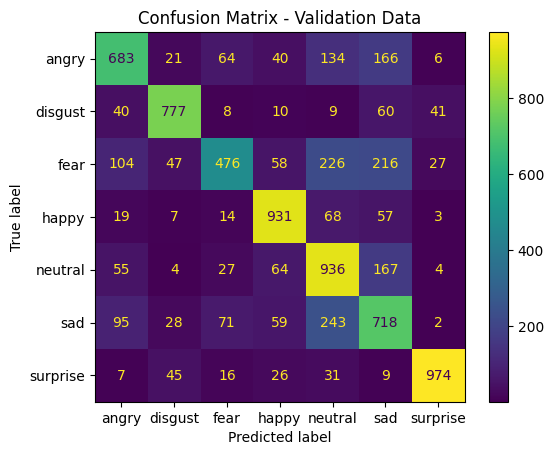

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluasi model
# Prediksi untuk data validasi
val_preds = model.predict(x_val)
y_val_preds = np.argmax(val_preds, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Classification report untuk data validasi
target_names_val = le.classes_
print("Classification Report for Validation Data")
print(classification_report(y_val_true, y_val_preds, target_names=target_names_val, digits=4))

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val_true, y_val_preds)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=target_names_val)
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classification Report for Test Data
              precision    recall  f1-score   support

       angry     0.6486    0.5333    0.5854        45
     disgust     0.8056    0.6444    0.7160        45
        fear     0.8276    0.5217    0.6400        46
       happy     0.7963    0.9348    0.8600        46
     neutral     0.5176    0.9778    0.6769        45
         sad     0.7419    0.5111    0.6053        45
    surprise     0.8889    0.8889    0.8889        45

    accuracy                         0.7161       317
   macro avg     0.7467    0.7160    0.7104       317
weighted avg     0.7471    0.7161    0.7106       317



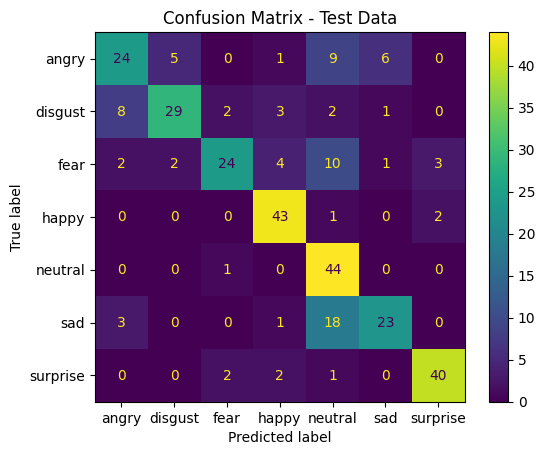

In [73]:
# Prediksi untuk data testing
test_preds = model.predict(x_test)
y_test_preds = np.argmax(test_preds, axis=1)
y_test_true = np.argmax(y_test, axis=1)


# Classification report untuk data testing
target_names_test = le.classes_
print("Classification Report for Test Data")
print(classification_report(y_test_true, y_test_preds, target_names=target_names_test, digits=4))

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=target_names_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()